# ECG Data Classification

## 1.Import statements

In [2]:
#General imports
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data Preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA

#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

#Hyperparameter Tuning 
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve

#Display settings
pd.set_option("display.max_rows", None, "display.max_columns", None)

## 2.Importing and analyzing dataset

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/ECG classification/mitbih_train.csv',header=None)
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/ECG classification/mitbih_test.csv',header=None)

## Add column names to dataset
column_list = []
for i in range(1,188):
  column_list.append('att_'+str(i))
column_list.append('class')
print(df_train.columns)
print('shape of train data ' + str(df_train.shape))
df_train.columns = column_list
print('shape of train data ' + str(df_train.shape))
df_test.columns = column_list

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
           dtype='int64', length=188)
shape of train data (87554, 188)
shape of train data (87554, 188)


In [4]:
df_train.head()

,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,att_10,att_11,att_12,att_13,att_14,att_15,att_16,att_17,att_18,att_19,att_20,att_21,att_22,att_23,att_24,att_25,att_26,att_27,att_28,att_29,att_30,att_31,att_32,att_33,att_34,att_35,att_36,att_37,att_38,att_39,att_40,att_41,att_42,att_43,att_44,att_45,att_46,att_47,att_48,att_49,att_50,att_51,att_52,att_53,att_54,att_55,att_56,att_57,att_58,att_59,att_60,att_61,att_62,att_63,att_64,att_65,att_66,att_67,att_68,att_69,att_70,att_71,att_72,att_73,att_74,att_75,att_76,att_77,att_78,att_79,att_80,att_81,att_82,att_83,att_84,att_85,att_86,att_87,att_88,att_89,att_90,att_91,att_92,att_93,att_94,att_95,att_96,att_97,att_98,att_99,att_100,att_101,att_102,att_103,att_104,att_105,att_106,att_107,att_108,att_109,att_110,att_111,att_112,att_113,att_114,att_115,att_116,att_117,att_118,att_119,att_120,att_121,att_122,att_123,att_124,att_125,att_126,att_127,att_128,att_129,att_130,att_131,att_132,att_133,att_134,att_135,att_136,att_137,att_138,att_139,att_140,att_141,att_142,att_143,att_144,att_145,att_146,att_147,att_148,att_149,att_150,att_151,att_152,att_153,att_154,att_155,att_156,att_157,att_158,att_159,att_160,att_161,att_162,att_163,att_164,att_165,att_166,att_167,att_168,att_169,att_170,att_171,att_172,att_173,att_174,att_175,att_176,att_177,att_178,att_179,att_180,att_181,att_182,att_183,att_184,att_185,att_186,att_187,class
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490,0.019943,0.022792,0.034188,0.014245,0.051282,0.068376,0.139601,0.287749,0.527066,0.777778,1.000000,0.888889,0.492877,0.190883,0.088319,0.062678,0.034188,0.00000,0.034188,0.017094,0.002849,0.000000,0.048433

In [5]:
df_test.head()

,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,att_10,att_11,att_12,att_13,att_14,att_15,att_16,att_17,att_18,att_19,att_20,att_21,att_22,att_23,att_24,att_25,att_26,att_27,att_28,att_29,att_30,att_31,att_32,att_33,att_34,att_35,att_36,att_37,att_38,att_39,att_40,att_41,att_42,att_43,att_44,att_45,att_46,att_47,att_48,att_49,att_50,att_51,att_52,att_53,att_54,att_55,att_56,att_57,att_58,att_59,att_60,att_61,att_62,att_63,att_64,att_65,att_66,att_67,att_68,att_69,att_70,att_71,att_72,att_73,att_74,att_75,att_76,att_77,att_78,att_79,att_80,att_81,att_82,att_83,att_84,att_85,att_86,att_87,att_88,att_89,att_90,att_91,att_92,att_93,att_94,att_95,att_96,att_97,att_98,att_99,att_100,att_101,att_102,att_103,att_104,att_105,att_106,att_107,att_108,att_109,att_110,att_111,att_112,att_113,att_114,att_115,att_116,att_117,att_118,att_119,att_120,att_121,att_122,att_123,att_124,att_125,att_126,att_127,att_128,att_129,att_130,att_131,att_132,att_133,att_134,att_135,att_136,att_137,att_138,att_139,att_140,att_141,att_142,att_143,att_144,att_145,att_146,att_147,att_148,att_149,att_150,att_151,att_152,att_153,att_154,att_155,att_156,att_157,att_158,att_159,att_160,att_161,att_162,att_163,att_164,att_165,att_166,att_167,att_168,att_169,att_170,att_171,att_172,att_173,att_174,att_175,att_176,att_177,att_178,att_179,att_180,att_181,att_182,att_183,att_184,att_185,att_186,att_187,class
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,0.121901,0.107438,0.105372,0.097107,0.105372,0.099174,0.105372,0.099174,0.107438,0.107438,0.115702,0.111570,0.121901,0.111570,0.119835,0.111570,0.113636,0.111570,0.121901,0.105372,0.107438,0.101240,0.101240,0.086777,0.092975,0.084711,0.082645,0.078512,0.078512,0.070248,0.076446,0.068182,0.078512,0.070248,0.068182,0.068182,0.074380,0.072314,0.090909,0.101240,0.107438,0.105372,0.121901,0.115702,0.109504,0.097107,0.103306,0.097107,0.086777,0.072314,0.070248,0.053719,0.057851,0.049587,0.057851,0.051653,0.055785,0.053719,0.053719,0.000000,0.012397,0.188017,0.681818,0.975207,0.615702,0.041322,0.012397,0.086777,0.066116,0.066116,0.051653,0.039256,0.043388,0.033058,0.041322,0.035124,0.045455,0.041322,0.045455,0.043388,0.049587,0.047521,0.06405,0.068182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,0.373626,0.366300,0.318681,0.311355,0.326007,0.311355,0.315018,0.322344,0.344322,0.344322,0.333333,0.304029,0.307692,0.282051,0.271062,0.285714,0.263736,0.274725,0.282051,0.267399,0.278388,0.289377,0.293040,0.289377,0.289377,0.289377,0.293040,0.282051,0.267399,0.256410,0.252747,0.216117,0.223443,0.238095,0.216117,0.267399,0.417582,0.582418,0.615385,0.622711,0.761905,0.864469,1.000000,0.908425,0.673993,0.315018,0.153846,0.120879,0.098901,0.043956,0.021978,0.021978,0.029304,0.000000,0.010989,0.029304,0.014652,0.021978,0.043956,0.087912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [6]:
df_train.isnull().sum()

att_1      0
att_2      0
att_3      0
att_4      0
att_5      0
att_6      0
att_7      0
att_8      0
att_9      0
att_10     0
att_11     0
att_12     0
att_13     0
att_14     0
att_15     0
att_16     0
att_17     0
att_18     0
att_19     0
att_20     0
att_21     0
att_22     0
att_23     0
att_24     0
att_25     0
att_26     0
att_27     0
att_28     0
att_29     0
att_30     0
att_31     0
att_32     0
att_33     0
att_34     0
att_35     0
att_36     0
att_37     0
att_38     0
att_39     0
att_40     0
att_41     0
att_42     0
att_43     0
att_44     0
att_45     0
att_46     0
att_47     0
att_48     0
att_49     0
att_50     0
att_51     0
att_52     0
att_53     0
att_54     0
att_55     0
att_56     0
att_57     0
att_58     0
att_59     0
att_60     0
att_61     0
att_62     0
att_63     0
att_64     0
att_65     0
att_66     0
att_67     0
att_68     0
att_69     0
att_70     0
att_71     0
att_72     0
att_73     0
att_74     0
att_75     0
att_76     0
att_77     0

In [ ]:
print(df_train.shape)
df_train = df_train.drop_duplicates()
print(df_train.shape)

Distribution of target class

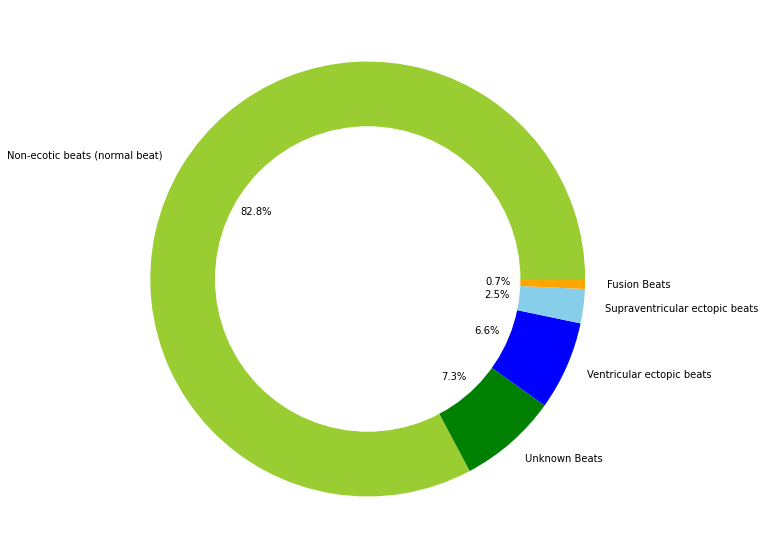

In [8]:
equilibre = df_train['class'].value_counts()
plt.figure(figsize = (20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels = ['Non-ecotic beats (normal beat)','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], 
        colors=['yellowgreen','green','blue','skyblue','orange'],autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## 3. Data preprocess

Concatinate both train and test datasets

In [9]:
df_data = pd.concat([df_train,df_test])
df_data.drop_duplicates()
y_data = df_data['class'].astype('int64', copy=False)
x_data = df_data.drop('class', 1)
print(len(y_data))

109446


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


Plot ECG signal data belonging to each class label

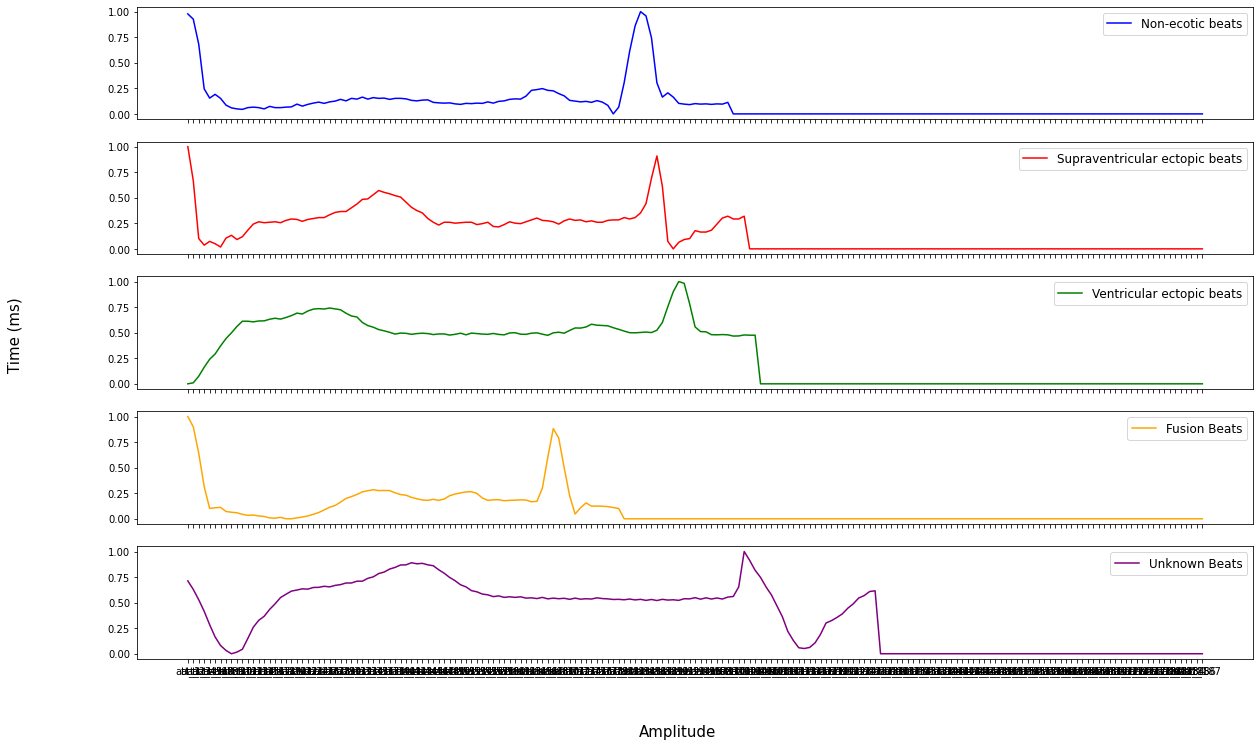

In [10]:
label = ["Non-ecotic beats","Supraventricular ectopic beats","Ventricular ectopic beats",
         "Fusion Beats","Unknown Beats"]
color = ['blue','red','green','orange','purple','black']
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True,figsize=(20,12))

for i, row in enumerate(ax):
  row.plot((df_train[df_train['class'] == i].iloc[0])[:-1], label=label[i], color=color[i])
  row.legend(fontsize=12)
fig.text(0.5, 0.04, 'Amplitude', va='center', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Time (ms)', va='center', ha='center', rotation='vertical', fontsize=15)
plt.show()

### standardizing dataset

In [11]:
sc = StandardScaler()
X_data = sc.fit_transform(x_data)

### Principle Component Analysis

In [12]:
def performPCA(df, n_components):
  pca = PCA(n_components = n_components)
  print("shape of data before PCA = " + str(df.shape))
  pca_x_data = pca.fit_transform(df)
  print("shape of data after PCA = " + str(pca_x_data.shape))
  pca_df_x = pd.DataFrame(pca_x_data)
  evr_scores = pca.explained_variance_ratio_
  information = 0.0
  for inf in evr_scores:
    information += inf
  print('Information retained after PCA = '+str(information*100))
  return pca_df_x

In [13]:
print('evaluating PCA with 30 components')
pca_df_x = performPCA(X_data,30)
print('evaluating PCA with 40 components')
pca_df_x = performPCA(X_data,40)
print('evaluating PCA with 50 components')
pca_df_x = performPCA(X_data,50)

pca = PCA(n_components = 100)
ind=[]
vare=[]
pca_data=pca.fit_transform(X_data) 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100) 
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))
    ind.append(index)
    vare.append(np.round(var,3))

evaluating PCA with 30 components
shape of data before PCA = (109446, 187)
shape of data after PCA = (109446, 30)
Information retained after PCA = 91.89463714591164
evaluating PCA with 40 components
shape of data before PCA = (109446, 187)
shape of data after PCA = (109446, 40)
Information retained after PCA = 94.91586459598366
evaluating PCA with 50 components
shape of data before PCA = (109446, 187)
shape of data after PCA = (109446, 50)
Information retained after PCA = 96.73128943911283
if n_components= 0,   variance=36.540000
if n_components= 1,   variance=52.190000
if n_components= 2,   variance=58.890000
if n_components= 3,   variance=63.720000
if n_components= 4,   variance=67.100000
if n_components= 5,   variance=69.610000
if n_components= 6,   variance=71.840000
if n_components= 7,   variance=73.610000
if n_components= 8,   variance=75.230000
if n_components= 9,   variance=76.710000
if n_components= 10,   variance=78.030000
if n_components= 11,   variance=79.210000
if n_compon

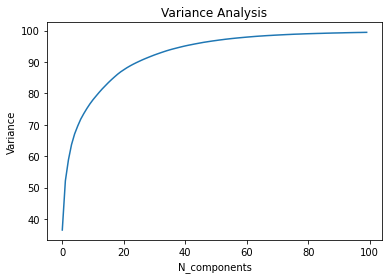

In [14]:
pd.Series(vare).plot()
plt.title("Variance Analysis")
plt.xlabel("N_components")
plt.ylabel("Variance");

With 50 components we were able to retain 96.74% information from the entire dataset. So we finalize the number of components with 50

In [15]:
pca_df_x = performPCA(X_data,50)

shape of data before PCA = (109446, 187)
shape of data after PCA = (109446, 50)
Information retained after PCA = 96.72952562052585


### Data sampling and data splitting

In [16]:
y_train = y_data.iloc[0:len(df_train['class'])]
x_train = pca_df_x.iloc[0:len(df_train['class']),:]
y_test = y_data.iloc[len(df_train['class']):]
x_test = pca_df_x.iloc[len(df_train['class']):,:]

# define the Over Sampling
smt = SMOTE()
# transform the dataset
smt_x_train, smt_y_train = smt.fit_resample(x_train, y_train)
print('\n Oversampling Data #######################')
print('Value count before SMOTE = \n'+ str(y_train.value_counts()))
print('Value count after SMOTE = \n'+ str(smt_y_train.value_counts()))


# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
nm_x_train, nm_y_train = undersample.fit_resample(x_train, y_train)
print('\nUndersampling Data #######################')
print('Value count before NearMiss = \n'+ str(y_train.value_counts()))
print('Value count after NearMiss = \n'+ str(nm_y_train.value_counts()))




 Oversampling Data #######################
Value count before SMOTE = 
0    72471
4     6431
2     5788
1     2223
3      641
Name: class, dtype: int64
Value count after SMOTE = 
0    72471
1    72471
2    72471
3    72471
4    72471
Name: class, dtype: int64

Undersampling Data #######################
Value count before NearMiss = 
0    72471
4     6431
2     5788
1     2223
3      641
Name: class, dtype: int64
Value count after NearMiss = 
0    641
1    641
2    641
3    641
4    641
Name: class, dtype: int64


Prepare *Dataset*

In [17]:
data = {
    "Imbalanced data" : [x_train , y_train],
    "Over_Sampled_data" : [smt_x_train , smt_y_train],
    "Under_Sampled_data" : [nm_x_train , nm_y_train]
}

## 4. Modelling 

### Create models 

In [18]:
models = {
    # "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000),
    # "Logistic Regression": LogisticRegression(random_state=10, max_iter=10000),
    # "Neural Network": MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=10000,activation = 'relu',solver='adam',random_state=1),
    "K-Nearest Neighbors": KNeighborsClassifier(metric='euclidean'),
    'RandomForest':RandomForestClassifier(random_state=42),
    # 'KMeans clustering': KMeans(n_clusters=5,random_state=123),
    'XGB': XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=5)
}

### A. Method to Evaluate model 

In [19]:
def Evaluate_Model(model_name,model_clf,data_type,X_train,y_train,X_test,y_test):
  print('****************************************\n*') 
  print('*    Model: ',model_name)
  print('*    Data: ', data_type)
  print('*\n****************************************') 
  start = time.time()
  model = model_clf.fit(X_train,y_train)
  end = time.time()
  training_time = end-start
  print(f'Model trained: Time elapsed = {training_time}')
  
  start = time.time()
  y_pred = model.predict(X_test)
  testing_time = time.time()-start
  print(f'Model test: Time elapsed = {testing_time}')
  
  y_prob = model.predict_proba(X_test)
  cm = confusion_matrix(y_test, y_pred)
  
  ## classification report
  print(classification_report(y_test, y_pred))
  AUC_test = round(roc_auc_score(y_test, y_prob, multi_class='ovr'), 3)
  Recall_test = round(np.mean(recall_score(y_test, y_pred, average=None),axis=0), 2)
  Precision_test = round(np.mean(precision_score(y_test, y_pred, average=None),axis=0),2)
  f1_Score_test = round(np.mean(f1_score(y_test, y_pred, average=None),axis=0),2)
  
  print('\n=====================================================\n')
  print(f'ROC AUC Test set score: {AUC_test}')
  print(f'Recall Test set score: {Recall_test}')
  print(f'Precision Test set score: {Precision_test}')
  print(f'f1 Score Test set : {f1_Score_test}')
  print('\n=====================================================\n')
 
  print(confusion_matrix(y_test, y_pred))


  # Plot Consfusion matrix heatmap
  ax= plt.subplot()
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn", fmt='g')
  ax.set_xlabel("Predicted labels");
  ax.set_ylabel("True labels");
  ax.set_title("Confusion Matrix of " +model_name); 
  plt.show()

  # # Plot RoC for classes
  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 5

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
  
  # plotting    
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Class 3 vs Rest')
  plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
  plt.title('ECG classification ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);
  plt.show()
  print('\n=====================================================\n')

  # return [model_name,data_type,training_time,AUC_test,Recall_test,Precision_test,f1_Score_test,AUC_CV,Recall_CV,Precision_CV,f1_CV]
  return [model_name,data_type,training_time,AUC_test,Recall_test,Precision_test,f1_Score_test]

Evaluating models

****************************************
*
*    Model:  Neural Network
*    Data:  Imbalanced data
*
****************************************
Model trained: Time elapsed = 134.11472415924072
Model test: Time elapsed = 0.1293327808380127
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.90      0.73      0.81       556
           2       0.97      0.92      0.94      1448
           3       0.75      0.76      0.76       162
           4       0.99      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.88      0.90     21892
weighted avg       0.98      0.98      0.98     21892



ROC AUC Test set score: 0.985
Recall Test set score: 0.88
Precision Test set score: 0.92
f1 Score Test set : 0.9


[[18030    38    28     8    14]
 [  134   408     9     3     2]
 [   83     4  1327    29     5]
 [   30     1     8   123     0]
 [   34     1     3     0

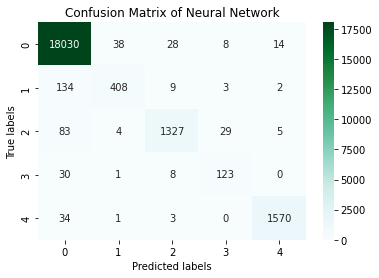

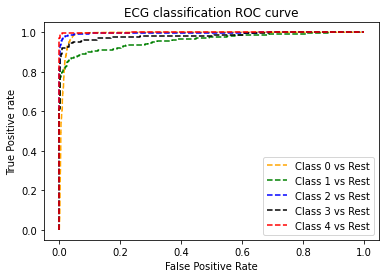



****************************************
*
*    Model:  Neural Network
*    Data:  Over_Sampled_data
*
****************************************
Model trained: Time elapsed = 560.840190410614
Model test: Time elapsed = 0.16265010833740234
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.81      0.77      0.79       556
           2       0.92      0.95      0.94      1448
           3       0.76      0.76      0.76       162
           4       0.98      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.89      0.89      0.89     21892
weighted avg       0.98      0.98      0.98     21892



ROC AUC Test set score: 0.983
Recall Test set score: 0.89
Precision Test set score: 0.89
f1 Score Test set : 0.89


[[17899    93    89    19    18]
 [  113   430    12     0     1]
 [   37     6  1380    20     5]
 [   23     0    16   123     0]
 [   24     2     6  

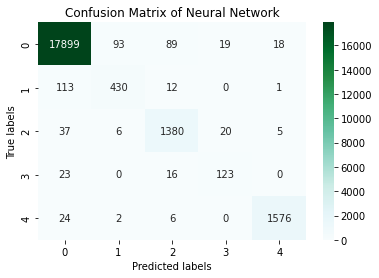

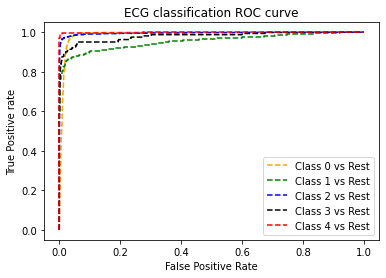



****************************************
*
*    Model:  Neural Network
*    Data:  Under_Sampled_data
*
****************************************
Model trained: Time elapsed = 6.898891925811768
Model test: Time elapsed = 0.12839245796203613
              precision    recall  f1-score   support

           0       0.97      0.05      0.09     18118
           1       0.04      0.60      0.07       556
           2       0.22      0.60      0.32      1448
           3       0.03      0.78      0.05       162
           4       0.47      0.84      0.60      1608

    accuracy                           0.16     21892
   macro avg       0.34      0.58      0.23     21892
weighted avg       0.85      0.16      0.15     21892



ROC AUC Test set score: 0.812
Recall Test set score: 0.58
Precision Test set score: 0.34
f1 Score Test set : 0.23


[[ 890 8843 2887 4044 1454]
 [  10  335   51  144   16]
 [   5   47  876  479   41]
 [  13    4   18  127    0]
 [   0   33  212   11 1352]]


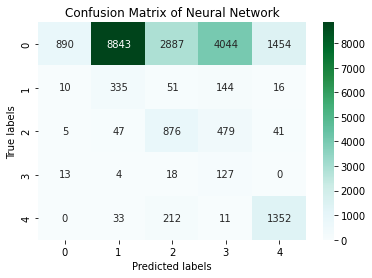

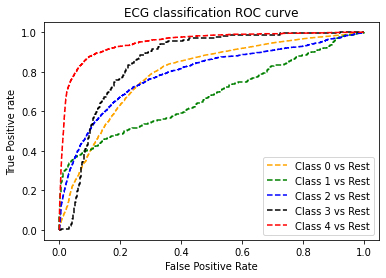



****************************************
*
*    Model:  K-Nearest Neighbors
*    Data:  Imbalanced data
*
****************************************
Model trained: Time elapsed = 0.021633625030517578
Model test: Time elapsed = 41.83149695396423
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.89      0.64      0.74       556
           2       0.94      0.89      0.91      1448
           3       0.76      0.66      0.71       162
           4       0.99      0.96      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.91      0.83      0.87     21892
weighted avg       0.97      0.97      0.97     21892



ROC AUC Test set score: 0.956
Recall Test set score: 0.83
Precision Test set score: 0.91
f1 Score Test set : 0.87


[[18018    40    46     8     6]
 [  190   354    11     0     1]
 [  129     4  1288    25     2]
 [   42     0    13   107     0]
 [   54     2   

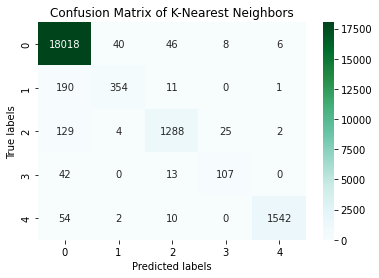

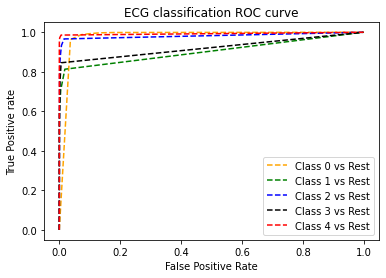



****************************************
*
*    Model:  K-Nearest Neighbors
*    Data:  Over_Sampled_data
*
****************************************
Model trained: Time elapsed = 0.0638895034790039
Model test: Time elapsed = 150.90467810630798
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18118
           1       0.52      0.82      0.64       556
           2       0.88      0.94      0.91      1448
           3       0.48      0.83      0.61       162
           4       0.96      0.98      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.77      0.91      0.82     21892
weighted avg       0.97      0.96      0.96     21892



ROC AUC Test set score: 0.957
Recall Test set score: 0.91
Precision Test set score: 0.77
f1 Score Test set : 0.82


[[17408   400   153   106    51]
 [   76   455    19     5     1]
 [   33    16  1364    28     7]
 [   11     2    14   134     1]
 [   17     4  

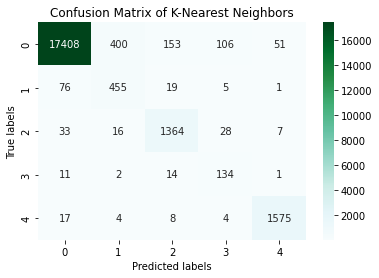

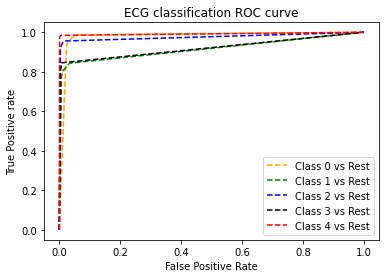



****************************************
*
*    Model:  K-Nearest Neighbors
*    Data:  Under_Sampled_data
*
****************************************
Model trained: Time elapsed = 0.003717184066772461
Model test: Time elapsed = 1.8263256549835205
              precision    recall  f1-score   support

           0       0.96      0.05      0.09     18118
           1       0.05      0.68      0.09       556
           2       0.23      0.49      0.32      1448
           3       0.03      0.73      0.07       162
           4       0.20      0.85      0.33      1608

    accuracy                           0.16     21892
   macro avg       0.30      0.56      0.18     21892
weighted avg       0.83      0.16      0.12     21892



ROC AUC Test set score: 0.75
Recall Test set score: 0.56
Precision Test set score: 0.3
f1 Score Test set : 0.18


[[ 854 7133 2293 2821 5017]
 [  16  377   22   91   50]
 [   0  128  714  334  272]
 [  21    4   18  119    0]
 [   0  130   29   86 1363]]


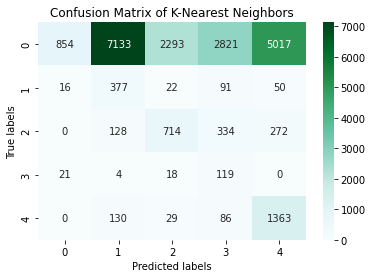

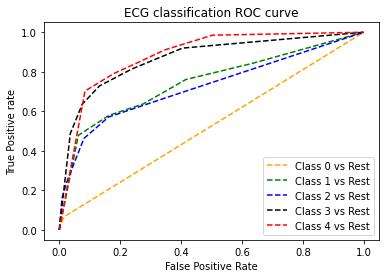



****************************************
*
*    Model:  RandomForest
*    Data:  Imbalanced data
*
****************************************
Model trained: Time elapsed = 137.29505801200867
Model test: Time elapsed = 0.4942893981933594
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18118
           1       0.98      0.56      0.71       556
           2       0.97      0.85      0.90      1448
           3       0.86      0.58      0.69       162
           4       1.00      0.92      0.96      1608

    accuracy                           0.97     21892
   macro avg       0.95      0.78      0.85     21892
weighted avg       0.97      0.97      0.97     21892



ROC AUC Test set score: 0.985
Recall Test set score: 0.78
Precision Test set score: 0.95
f1 Score Test set : 0.85


[[18091     7    17     0     3]
 [  239   309     8     0     0]
 [  205     0  1226    15     2]
 [   58     0    10    94     0]
 [  120     0     9     

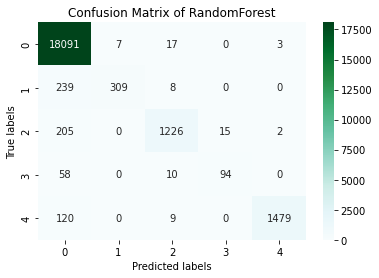

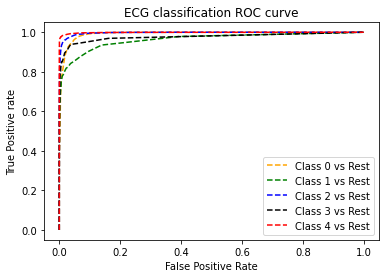



****************************************
*
*    Model:  RandomForest
*    Data:  Over_Sampled_data
*
****************************************
Model trained: Time elapsed = 595.0313158035278
Model test: Time elapsed = 0.5554938316345215
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.84      0.74      0.78       556
           2       0.95      0.92      0.93      1448
           3       0.77      0.73      0.75       162
           4       1.00      0.96      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.87      0.89     21892
weighted avg       0.98      0.98      0.98     21892



ROC AUC Test set score: 0.991
Recall Test set score: 0.87
Precision Test set score: 0.91
f1 Score Test set : 0.89


[[17976    77    47    15     3]
 [  136   410     8     1     1]
 [   93     1  1334    19     1]
 [   31     0    13   118     0]
 [   54     2     7    

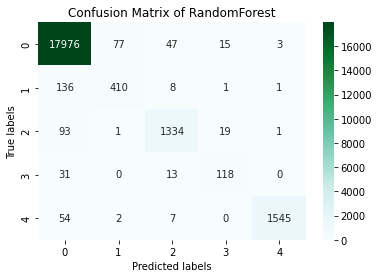

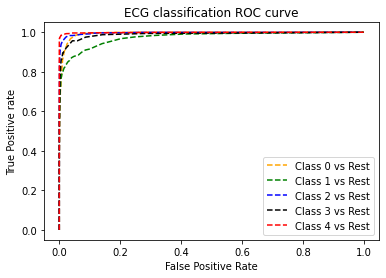



****************************************
*
*    Model:  RandomForest
*    Data:  Under_Sampled_data
*
****************************************
Model trained: Time elapsed = 1.9041087627410889
Model test: Time elapsed = 0.2998924255371094
              precision    recall  f1-score   support

           0       0.97      0.02      0.04     18118
           1       0.04      0.77      0.07       556
           2       0.15      0.50      0.23      1448
           3       0.05      0.75      0.10       162
           4       0.30      0.62      0.40      1608

    accuracy                           0.12     21892
   macro avg       0.30      0.53      0.17     21892
weighted avg       0.83      0.12      0.08     21892



ROC AUC Test set score: 0.769
Recall Test set score: 0.53
Precision Test set score: 0.3
f1 Score Test set : 0.17


[[  411 10403  3393  1839  2072]
 [    1   430    75    38    12]
 [    1   217   726   238   266]
 [   12     6    22   122     0]
 [    0    52   551   

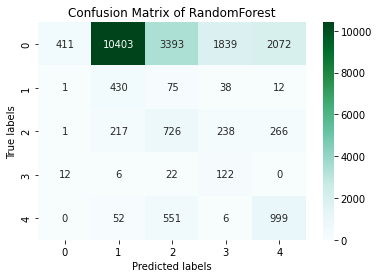

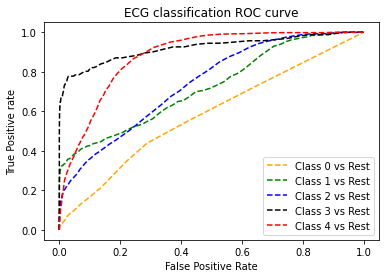



****************************************
*
*    Model:  XGB
*    Data:  Imbalanced data
*
****************************************
Model trained: Time elapsed = 2538.5487661361694
Model test: Time elapsed = 10.617035150527954
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.95      0.62      0.75       556
           2       0.96      0.91      0.93      1448
           3       0.82      0.70      0.75       162
           4       1.00      0.96      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.94      0.84      0.88     21892
weighted avg       0.98      0.98      0.98     21892



ROC AUC Test set score: 0.988
Recall Test set score: 0.84
Precision Test set score: 0.94
f1 Score Test set : 0.88


[[18067    18    27     3     3]
 [  200   347     8     0     1]
 [  100     1  1322    22     3]
 [   35     0    14   113     0]
 [   46     1    13     0  1548]]

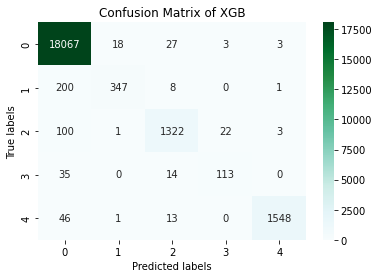

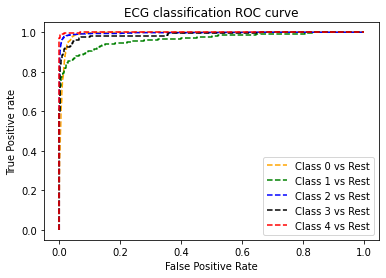



****************************************
*
*    Model:  XGB
*    Data:  Over_Sampled_data
*
****************************************
Model trained: Time elapsed = 12439.488094568253
Model test: Time elapsed = 11.028059005737305
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.72      0.78      0.74       556
           2       0.92      0.94      0.93      1448
           3       0.73      0.78      0.75       162
           4       0.99      0.98      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.87      0.89      0.88     21892
weighted avg       0.98      0.97      0.97     21892



ROC AUC Test set score: 0.986
Recall Test set score: 0.89
Precision Test set score: 0.87
f1 Score Test set : 0.88


[[17847   156    77    25    13]
 [  113   431    11     0     1]
 [   58     7  1359    21     3]
 [   21     1    14   126     0]
 [   22     7    10     1  1568

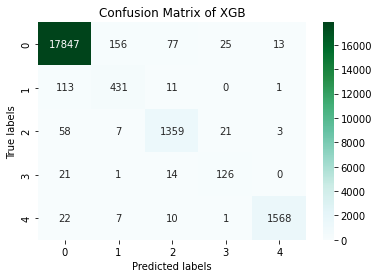

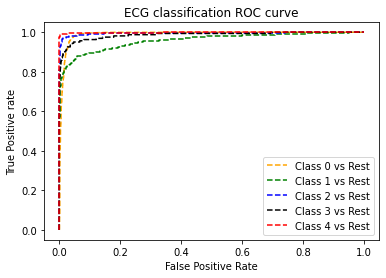



****************************************
*
*    Model:  XGB
*    Data:  Under_Sampled_data
*
****************************************
Model trained: Time elapsed = 48.48867988586426
Model test: Time elapsed = 6.186349153518677
              precision    recall  f1-score   support

           0       0.97      0.03      0.06     18118
           1       0.04      0.72      0.07       556
           2       0.20      0.44      0.28      1448
           3       0.04      0.81      0.07       162
           4       0.36      0.84      0.51      1608

    accuracy                           0.14     21892
   macro avg       0.32      0.57      0.20     21892
weighted avg       0.85      0.14      0.11     21892



ROC AUC Test set score: 0.801
Recall Test set score: 0.57
Precision Test set score: 0.32
f1 Score Test set : 0.2


[[  582 10315  2212  2961  2048]
 [    3   402    16   120    15]
 [    5    94   631   423   295]
 [    9     3    19   131     0]
 [    0    10   241     8  1349]]

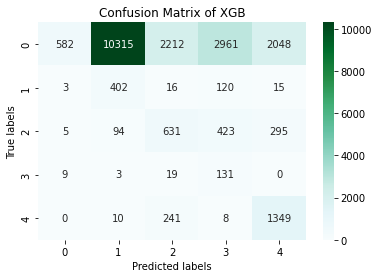

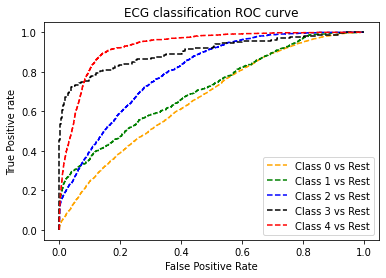

In [20]:
result = []
for model_name, model_clf in models.items():
    for data_type, training_data in data.items():
        result.append(Evaluate_Model(model_name,model_clf,data_type,training_data[0],training_data[1],x_test,y_test))

In [21]:
#Creating dataframe with result
print(result)
Output = pd.DataFrame(result, columns = ['Model', 'Data', 'Training Time','AUC Test', 'Recall Test', 'Precision Test', 'f1 Score test'])

[['Neural Network', 'Imbalanced data', 134.11472415924072, 0.985, 0.88, 0.92, 0.9], ['Neural Network', 'Over_Sampled_data', 560.840190410614, 0.983, 0.89, 0.89, 0.89], ['Neural Network', 'Under_Sampled_data', 6.898891925811768, 0.812, 0.58, 0.34, 0.23], ['K-Nearest Neighbors', 'Imbalanced data', 0.021633625030517578, 0.956, 0.83, 0.91, 0.87], ['K-Nearest Neighbors', 'Over_Sampled_data', 0.0638895034790039, 0.957, 0.91, 0.77, 0.82], ['K-Nearest Neighbors', 'Under_Sampled_data', 0.003717184066772461, 0.75, 0.56, 0.3, 0.18], ['RandomForest', 'Imbalanced data', 137.29505801200867, 0.985, 0.78, 0.95, 0.85], ['RandomForest', 'Over_Sampled_data', 595.0313158035278, 0.991, 0.87, 0.91, 0.89], ['RandomForest', 'Under_Sampled_data', 1.9041087627410889, 0.769, 0.53, 0.3, 0.17], ['XGB', 'Imbalanced data', 2538.5487661361694, 0.988, 0.84, 0.94, 0.88], ['XGB', 'Over_Sampled_data', 12439.488094568253, 0.986, 0.89, 0.87, 0.88], ['XGB', 'Under_Sampled_data', 48.48867988586426, 0.801, 0.57, 0.32, 0.2]]


In [22]:
Output

,Model,Data,Training Time,AUC Test,Recall Test,Precision Test,f1 Score test
0,Neural Network,Imbalanced data,134.114724,0.985,0.88,0.92,0.90
1,Neural Network,Over_Sampled_data,560.840190,0.983,0.89,0.89,0.89
2,Neural Network,Under_Sampled_data,6.898892,0.812,0.58,0.34,0.23
3,K-Nearest Neighbors,Imbalanced data,0.021634,0.956,0.83,0.91,0.87
4,K-Nearest Neighbors,Over_Sampled_data,0.063890,0.957,0.91,0.77,0.82
5,K-Nearest Neighbors,Under_Sampled_data,0.003717,0.750,0.56,0.30,0.18
6,RandomForest,Imbalanced data,137.295058,0.985,0.78,0.95,0.85
7,RandomForest,Over_Sampled_data,595.031316,0.991,0.87,0.91,0.89
8,RandomForest,Under_Sampled_data,1.904109,0.769,0.53,0.30,0.17
9,XGB,Imbalanced data,2538.548766,0.988,0.84,0.94,0.88
